### Importing the libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import save_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation,Dense
from keras.utils import plot_model

### Creating feature matrix and target vector

In [2]:
X=np.array(([1,1,1,0],[0,1,0,1],[1,1,0,0],[1,0,0,1]), dtype=float)
y=np.array(([0],[1],[0],[1]), dtype=float)

### Building the model

In [3]:
model= tf.keras.Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the model

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [9]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1/1 [==============================] - 0s 136ms/step - loss: 0.4787 - accuracy: 0.7500
Epoch 2/150
1/1 [==============================] - 0s 43ms/step - loss: 0.4757 - accuracy: 0.7500
Epoch 3/150
1/1 [==============================] - 0s 18ms/step - loss: 0.4727 - accuracy: 0.7500
Epoch 4/150
1/1 [==============================] - 0s 31ms/step - loss: 0.4696 - accuracy: 0.7500
Epoch 5/150
1/1 [==============================] - 0s 14ms/step - loss: 0.4665 - accuracy: 0.7500
Epoch 6/150
1/1 [==============================] - 0s 20ms/step - loss: 0.4635 - accuracy: 0.7500
Epoch 7/150
1/1 [==============================] - 0s 10ms/step - loss: 0.4603 - accuracy: 0.7500
Epoch 8/150
1/1 [==============================] - 0s 42ms/step - loss: 0.4573 - accuracy: 0.7500
Epoch 9/150
1/1 [==============================] - 0s 14ms/step - loss: 0.4544 - accuracy: 0.7500
Epoch 10/150
1/1 [==============================] - 0s 15ms/step - loss: 0.4514 - accuracy: 0.7500
Epoch 11/150
1/1 [

### Evaluating the model

In [10]:
accuracy= model.evaluate(X, y, verbose=0)
print('%s: %.2f%%' %(model.metrics_names[1], accuracy[1]*100))

accuracy: 100.00%


### Summarizing the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


### Making predictions with the model

In [12]:
predictions=(model.predict(X) > 0.5).astype(int)
predictions

1/1 [==============================] - 0s 400ms/step


array([[0],
       [1],
       [0],
       [1]])

### looping through the model to compare actual and expected

In [15]:
for i in range(4):
    print('%s => %d (expected %d)' % (X[i]. tolist(), predictions[i], y[i]))

[1.0, 1.0, 1.0, 0.0] => 0 (expected 0)
[0.0, 1.0, 0.0, 1.0] => 1 (expected 1)
[1.0, 1.0, 0.0, 0.0] => 0 (expected 0)
[1.0, 0.0, 0.0, 1.0] => 1 (expected 1)


### Saving the model

In [16]:
save_model(model, 'model.h5')

### Ploting the graph of the model

Plotting the model


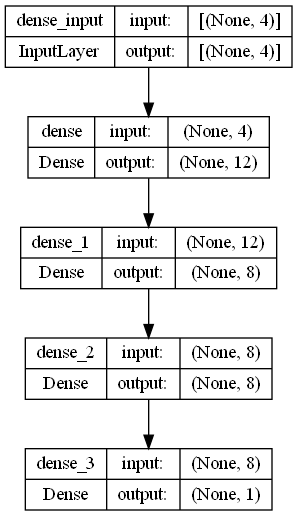

In [19]:
print("Plotting the model")
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)
